# Milestone 2

- Name : Rahmat Fadhli Syauqi
- Batch : FTDS011

URL Backend : https://airplane-pred.herokuapp.com/
URL Frontend : https://satisfaction-predictor.herokuapp.com/

## I. Introduction

This project is meant for fulfilling Hacktiv8 Fulltime Datascience Bootcamp Milestone-2 assignment.

In this project, I will try to create end-to-end Machine Learning prediction model using several Supervised Learning algorithm that is available in Sklearn library.

**I.2 Dataset Description**

This dataset contains an airline passenger satisfaction survey. All the data will be treating this as a binary classification problem, where we will attemp to create a model that predicts whether a customer was Satisfied or Unsatisfied with the experience and/or service which an airline provided.

And the dataset we collected from Kaggle "https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction".

**I.3 Data Set Information:**

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger.

- Gender: Gender of the passengers (Female, Male)

- Customer Type: The customer type (Loyal customer, disloyal customer)

- Age: The actual age of the passengers

- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

- Flight distance: The flight distance of this journey

- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

- Ease of Online booking: Satisfaction level of online booking

- Gate location: Satisfaction level of Gate location

- Food and drink: Satisfaction level of Food and drink

- Online boarding: Satisfaction level of online boarding

- Seat comfort: Satisfaction level of Seat comfort

- Inflight entertainment: Satisfaction level of inflight entertainment

- On-board service: Satisfaction level of On-board service

- Leg room service: Satisfaction level of Leg room service

- Baggage handling: Satisfaction level of baggage handling

- Check-in service: Satisfaction level of Check-in service

- Inflight service: Satisfaction level of inflight service

- Cleanliness: Satisfaction level of Cleanliness

- Departure Delay in Minutes: Minutes delayed when departure

- Arrival Delay in Minutes: Minutes delayed when Arrival

- Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

**I.4 Objectives**

Create a machine larning model that can estimate Satisfaction of passangers based on the features of the dataset.

---
# II. Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.express as px
from matplotlib import cm

# Data Preprocessing
from sklearn.model_selection import train_test_split
from feature_engine.outliers import OutlierTrimmer, Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from mlxtend.plotting import plot_confusion_matrix

# Metric
from sklearn.metrics import classification_report, roc_auc_score, auc, RocCurveDisplay, roc_curve, confusion_matrix

# Deployment
import pickle

import warnings
warnings.filterwarnings("ignore")

# III. Data Loading

In [2]:
# Load Data and save it in `df_og` variable
df_train_test = pd.read_csv('train.csv')

# Make copy from the df
df = df_train_test.copy()

**Dataset Preview**

In [3]:
# Show the dataset
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [73]:
# Dataset shape 
df.shape

(103904, 25)

In [74]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [75]:
# Null value summary
df.isnull().sum().sort_values()

Unnamed: 0                             0
Departure Delay in Minutes             0
Cleanliness                            0
Inflight service                       0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Inflight entertainment                 0
Seat comfort                           0
Online boarding                        0
Food and drink                         0
Ease of Online booking                 0
Departure/Arrival time convenient      0
Inflight wifi service                  0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
Customer Type                          0
Gender                                 0
id                                     0
Gate location                          0
satisfaction                           0
Arrival Delay in

In [76]:
# Dataset Check
df.describe(percentiles=[0.5]).T

,count,mean,std,min,50%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,51951.5,103903.0
id,103904.0,64924.210502,37463.812252,1.0,64856.5,129880.0
Age,103904.0,39.379706,15.114964,7.0,40.0,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,843.0,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,3.0,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,3.0,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,3.0,5.0
Gate location,103904.0,2.976883,1.277621,0.0,3.0,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,3.0,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,3.0,5.0


In [77]:
# Dataset Check
df.describe(include=object).T

,count,unique,top,freq
Gender,103904,2,Female,52727
Customer Type,103904,2,Loyal Customer,84923
Type of Travel,103904,2,Business travel,71655
Class,103904,3,Business,49665
satisfaction,103904,2,neutral or dissatisfied,58879


In [ ]:
df = df.drop(['Unnamed: 0', 'id'], axis = 1)

Insight from Dataset Preview process:

Based on above process, I get these information:

- The dataset consist of 103904 rows of entries and 25 columns.
- There are 5 features of object type, 1 feature of float type, and 19 features of integer type.
- There are apparent missing values in 'Arrive Delay in Minutes', i'll check it later in the process.
- There are no strange values in numerical or categorical features.
- We drop 2 columns which is 'Unnamed: 0' and 'id'.

---
# IV. Exploratory Data Analysis

**Preliminary Check**

Before going deep into the dataset, Let's generaly check the dataset. 
First of all i will rename the column name.

In [3]:
# Rename the column
df.rename(columns={'Customer Type': 'Customer_Type','Type of Travel' : 'Type_Travel', 'Flight Distance' : 'Flight_distance', 
                    'Inflight wifi service' : 'Inflight_wifi', 'Departure/Arrival time convenient' : 'Dep/Arv_time', 
                   'Ease of Online booking' : 'Ease_booking', 'Gate location' : 'Gate_location', 'Food and drink'	: 'Food_drink',
                    'Online boarding' : 'Online_boarding', 'Seat comfort' : 'Seat_comfort', 'Inflight entertainment' : 'Inflight_entertainment',
                    'On-board service' : 'On-board_service', 'Leg room service' : 'Leg_room', 'Baggage handling' : 'Baggage_handling',
                    'Checkin service' : 'Checkin_service', 'Inflight service' : 'Inflight_service', 'Departure Delay in Minutes' : 'Departure_delay',
                    'Arrival Delay in Minutes' : 'Arrival_delay', 'satisfaction' : 'Satisfaction'}, inplace=True)

Looks like this variable is good to go. I'll just change the variable name into more cleaner look and change the input into neutral or dissatisfied :0 and satisfied :1.

In [81]:
# Convert to numerical format
# Make dictionary
y_rename = {'satisfied':1, 'neutral or dissatisfied':0}
# Renaming process
df['Satisfaction'] = df['Satisfaction'].map(y_rename)
# Confirmation
print(df['Satisfaction'].unique())

[0 1]


In [82]:
# Preliminary Check
# Variable : Age
# Description : Age

var = 'Age'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe())

variable: Age
null value count:  0

Descriptive stats:
count    103904.000000
mean         39.379706
std          15.114964
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64


**Univaraite Analysis**

In this part of sub-process, I'll try to plot the histogram of numerical features and see the distribution of each feature.

Since our target parameter is **'Satisfaction'**, let's get to know about it more deeply.

In [4]:
# Number of unique value
print(df['Class'].value_counts())
print()
print(df['Class'].value_counts(normalize=True)*100)

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

Business    47.798930
Eco         44.988643
Eco Plus     7.212427
Name: Class, dtype: float64


In [9]:
# Number of unique value
print(df['Inflight_wifi'].value_counts())
print()
print(df['Inflight_wifi'].value_counts(normalize=True)*100)

3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Inflight_wifi, dtype: int64

3    24.896058
2    24.859486
4    19.050277
1    17.169695
5    11.038074
0     2.986411
Name: Inflight_wifi, dtype: float64


In [84]:
# Number of unique value
print(df['Satisfaction'].value_counts())
print()
print(df['Satisfaction'].value_counts(normalize=True)*100)

0    58879
1    45025
Name: Satisfaction, dtype: int64

0    56.666731
1    43.333269
Name: Satisfaction, dtype: float64


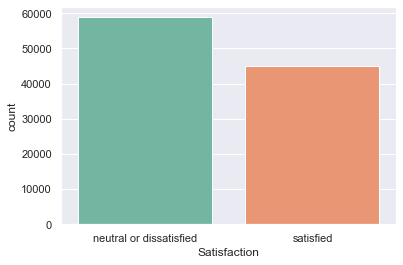

In [85]:
# Distribution Check

g= sns.countplot(df['Satisfaction'], palette='Set2')
g.set(xticklabels=['neutral or dissatisfied', 'satisfied'])
plt.show()

From this we can know that our target values has Balance data with 56.6% Not satisfied of total instances, so we can continue process. So the data is quite balanced and it does not require any special treatment/resampling.

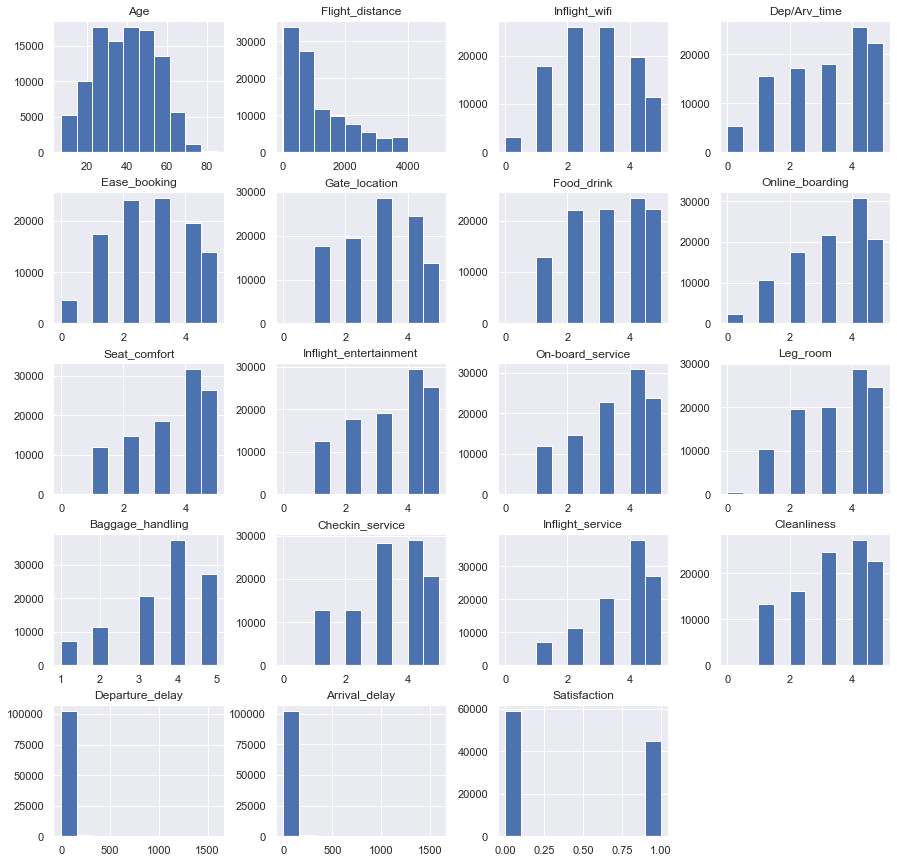

In [86]:
# Histogram Plot
df.hist()
plt.gcf().set_size_inches(15, 15)
plt.show()


From the graph above, We can see that:

- Age, Inflight_wifi, Ease_booking has normal distribution
- Flight_distance, Dep/Arv_time, Gate_location, Food_drink, Online_boarding, Seat_comfort,, Inflight_entertainment, On-board_service, Leg_room, Baggage_handling, Checkin_service, Inflight_servicer & Cleanliness follow slight skew distribution.

**Bivariate/Multivariate Analysis**

The purpose of bivariate analysis is to understand the relationship between two or more variables.

n this part of sub-process, I will try to explore some facts inside the dataset with **'satisfaction'** variable as my focus.

In [87]:
# Create function for boxplot
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

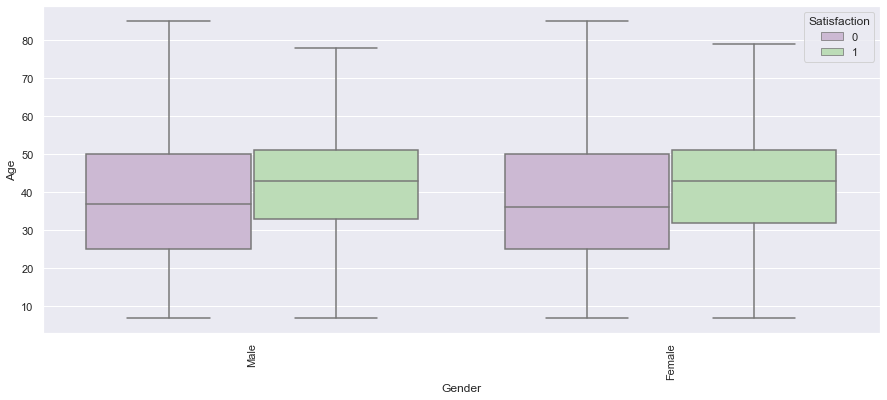

In [88]:
# Show boxplot graph of Gender ,Age & Satisfaction
boxplot_variation('Gender','Age', 'Satisfaction',15)

Based on gender, both Male and Females has some balance Satisfaction and Not Satisfied on age 25 into 50 from this we know more Un-satisfied & Satisfied passangers comes from Adults.

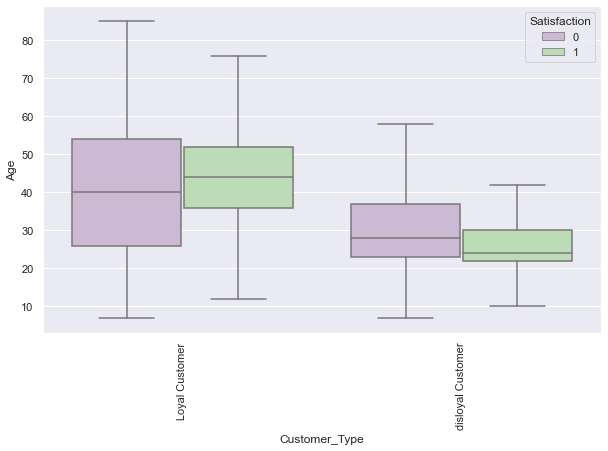

In [89]:
# Show boxplot graph of Customer_Type, Age & Satisfaction
boxplot_variation('Customer_Type','Age', 'Satisfaction',10)

As we know from this graph, we can consider Customer_type has more Satisfaction on Loyal Customer than Disloyal Customer, and has higher average between 35 - 50 yo, in this graph we know that loyal customer come from they already young until old, and disloyal customer come from Adults with average on 25 - 30 years old.

From this too we can know more Not Satisfied comes from Loyal Customer from young age into Older Age.

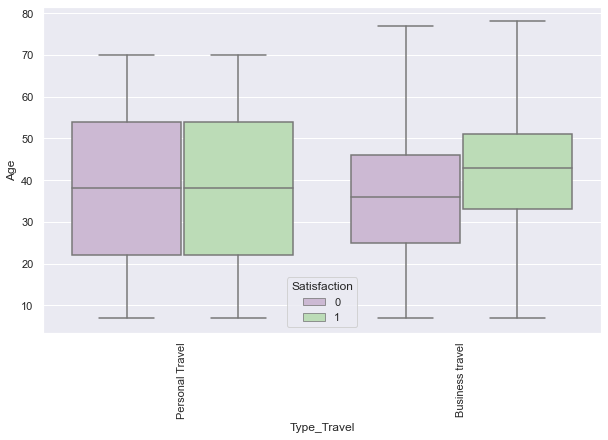

In [90]:
# Show boxplot graph of Type_Travel, Age & Satrisfaction
boxplot_variation('Type_Travel','Age', 'Satisfaction',10)

From the graph we can see on Persontal Travel category has balance data with average age of 25 - 55 years old, and Business Travel category has satisfaction average age of 35 - 50 years old and Un-satisfied at 25 - 45 years old, we can know on business travel, the older one always get satisfied with the service and the adult more get Un-satisfied.

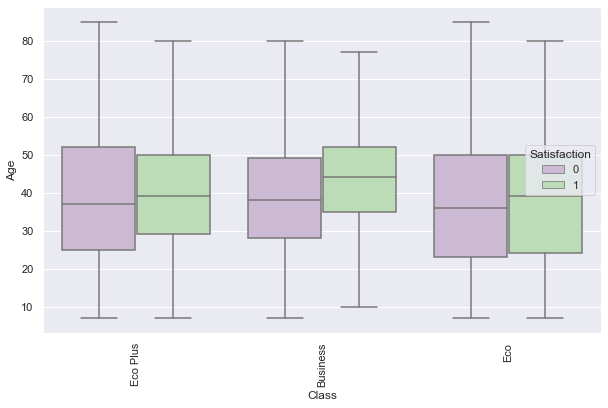

In [91]:
# Show boxplot graph of Class, Age & Satrisfaction
boxplot_variation('Class','Age', 'Satisfaction',10)

From Category Eco Plus & Eco has the ratio of satisfied and dissatisfied ones are almost 50% and 50% respectively, but the average satisfied age is higher than average dissatisfied age. From business class we can see the average age of business class has higher satisfaction than average of eco class.

Cause we already look correlation between each input variables to target variable, now we need to explore more map correlation from every parameter and we need to plot it in a graph.

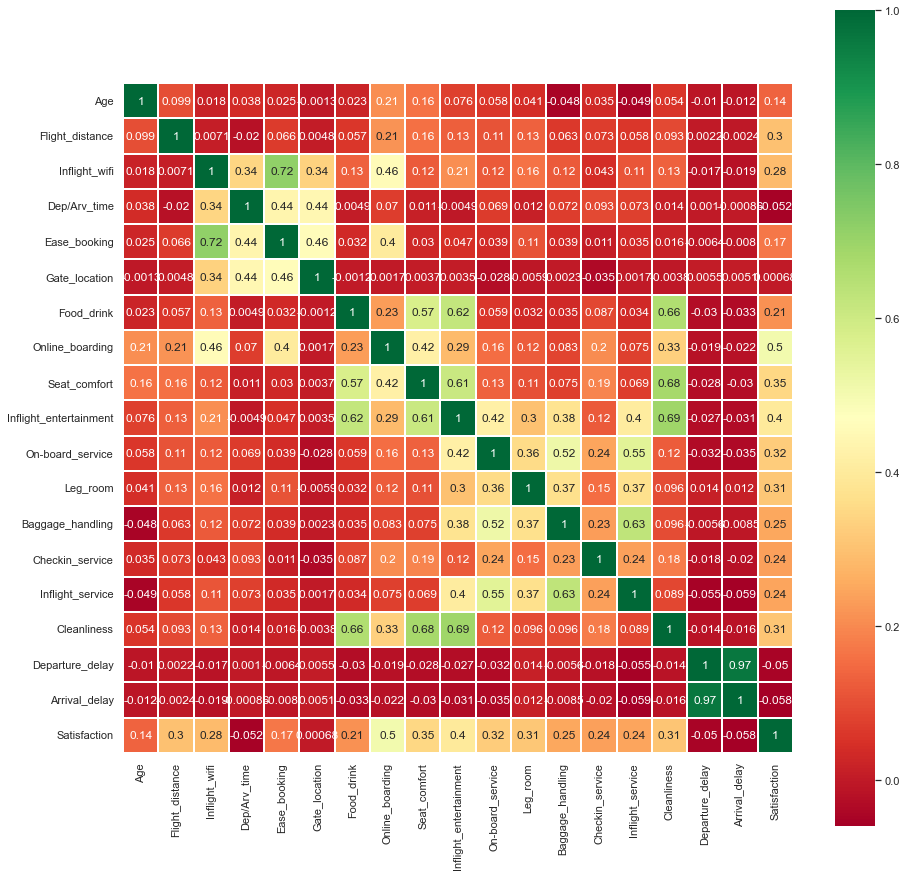

In [92]:

# Checking correlation between each variables

# Heatmap
corrmat = df.corr()
top_corr_feature = corrmat.index

plt.figure(figsize=(15,15))

g = sns.heatmap(df[top_corr_feature].corr(), annot=True, cmap='RdYlGn', square=1, linewidths=0.05)

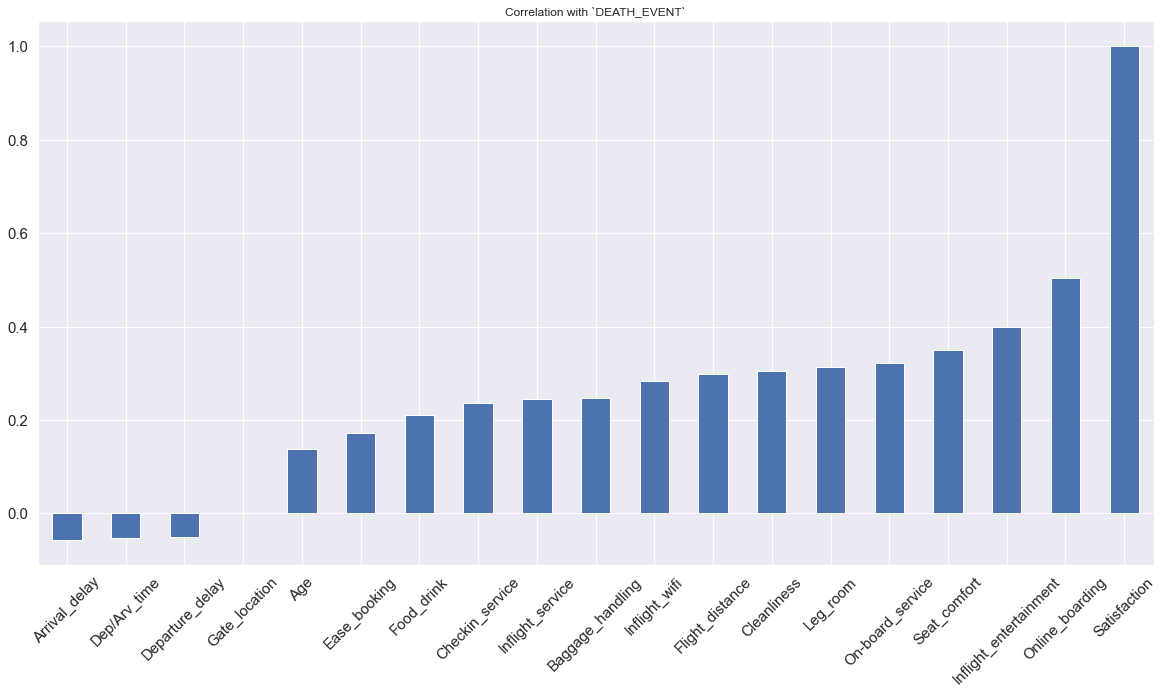

In [93]:
# Checking correlation between target variable and input variables

df.corrwith(df['Satisfaction']).sort_values().plot.bar(figsize=(20,10), title='Correlation with `DEATH_EVENT`', fontsize=15, rot=45, grid=True)
plt.show()

Based on graph above, I can summarize top features that correlate with **Satisfaction** target label:

- three positive correlated : Online_boarding, Seat_comfort, Inflight_entertainment
- three negative correlated : Arrival_delay, Departure_delay, Dep/Arv_time
- Dominant passengers get satisfied cause of entertainment service and eas of online booking
- And from the facts that we get, The delay of flights was the affected dissastisfied passangers.

---

# V. Data Preprocessing

In this process I split my dataset into train, test, and inference dataset.

**Dataset Splitting**

In this process, I will split my dataset into different set:

- Use 80% from dataset for Train Set
- Use 20% from dataset for Test Set
- Use Test.csv for Inference Set

all of those entries will be randomly selected from the dataset.

In [149]:
#Set Random State
random_state = 42

In [150]:
# Inference Set Preparation

inf_set = pd.read_csv('test.csv')
inf_set.shape

(25976, 25)

So because the dataset already split, now the Test.csv we gonna use for Inference set.

In [96]:
# Splitting Dataset

# X will be consist of features only
X = df.drop(['Satisfaction'], axis=1)

# y will be consist of target only
y = df['Satisfaction']

In [97]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [98]:
# Size Summary

print('Train Set shape : ', X_train.shape)
print('Test Set shape : ', X_test.shape)
print('Inference Set shape : ', inf_set.shape)

Train Set shape :  (72732, 22)
Test Set shape :  (31172, 22)
Inference Set shape :  (25976, 25)


Train set, Test set and Inference set already done splitting, now we can to the next process handling handling missing value and outliers.

**Outliers Detection**

In this sub-process, I will try to identify any outliers inside each numerical input variables.

- First, I'll check the distribution of each variable, using skewness value. Any skewness value outside -0.5 to 0.5 will be considered as Skewed Distribution, while any skewness value inside -0.5 to 0.5 will be considered as Normal Distribution.
- Second, I'll count how many outliers there in each variable. For Normal Distribution, I'll use Z-score to determine the outliers threshold. For Skewed Distribution, I'll use IQR to determine the outliers threshold.
- Third Summarize all the information above.

In [99]:
# column categorization
def col_categorization(df):
    global X_train_num, X_train_cat
    X_train_num = df[['Age', 'Flight_distance', 'Inflight_wifi', 'Dep/Arv_time', 
                    'Ease_booking', 'Gate_location', 'Food_drink', 'Online_boarding', 
                    'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 
                    'Leg_room', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 
                    'Departure_delay', 'Arrival_delay' ]]
    X_train_cat = df[['Gender', 'Customer_Type', 'Type_Travel', 'Class']]
    print("Generate 'X_train_num' and 'X_train_cat'")

# column categorization
col_categorization(X_train)

Generate 'X_train_num' and 'X_train_cat'


In [100]:
# Confirmation Check
X_train_num.head()

,Age,Flight_distance,Inflight_wifi,Dep/Arv_time,Ease_booking,Gate_location,Food_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room,Baggage_handling,Checkin_service,Inflight_service,Departure_delay,Arrival_delay
17901,35,1235,1,4,1,3,4,1,4,4,4,4,4,5,5,0,19.0
49209,56,603,5,5,5,5,4,4,5,5,5,5,5,5,5,89,86.0
32340,45,2586,2,2,2,3,3,3,4,1,1,2,1,2,1,0,0.0
50831,47,2422,2,2,2,2,2,5,5,4,4,4,4,4,4,0,0.0
10989,40,1076,2,4,2,3,4,2,4,4,5,3,5,4,4,18,18.0


In [101]:
# Confirmation Check
X_train_cat.head()

,Gender,Customer_Type,Type_Travel,Class
17901,Female,Loyal Customer,Personal Travel,Eco
49209,Male,Loyal Customer,Business travel,Business
32340,Female,Loyal Customer,Personal Travel,Eco
50831,Male,Loyal Customer,Business travel,Business
10989,Male,Loyal Customer,Personal Travel,Eco


After we splitting each feature from categorization and numerical. Now we need to create a funtion to detect outliers from each feature so we can handle outliers perfectly before we train to our model.

In [102]:
# create function to detect outliers based on distribution
def detect_outliers(df, k=1.5):
    #create dataframe with columns name : feature, distribution, outlier
    global df_outliers
    df_outliers = pd.DataFrame(columns=['col_name','distribution','bottom_limit', 'upper_limit', 'left_tail','right_tail','outliers_count','percentage'])
    #create loop for each feature
    for i in range(len(df.columns)):
        #create if statement for each distribution
        if df.iloc[:,i].skew() > -0.5 and df.iloc[:,i].skew() < 0.5 :
            #count outlier for normal distribution based on z-score
            df_outliers.loc[i] = [df.columns[i], # col_name
                                'normal', # distribution,
                                stats.zscore(df.iloc[:,i], nan_policy='omit').min(), # bottom limit
                                stats.zscore(df.iloc[:,i], nan_policy='omit').max(), # upper limit
                                df.iloc[:,i][(stats.zscore(df.iloc[:,i],nan_policy='omit'))<-3].count(), # left_tail
                                df.iloc[:,i][(stats.zscore(df.iloc[:,i],nan_policy='omit'))>3].count(), # right_tail
                                df.iloc[:,i][abs(stats.zscore(df.iloc[:,i],nan_policy='omit'))>3].count(), # outliers_count
                                df.iloc[:,i][abs(stats.zscore(df.iloc[:,i],nan_policy='omit'))>3].count()/len(df.iloc[:,i])*100] # percentage
        else:
            #count outlier for skew distribution based on IQR
            Q1 = df.iloc[:,i].quantile(0.25)
            Q3 = df.iloc[:,i].quantile(0.75)
            IQR = Q3 - Q1
            df_outliers.loc[i] = [df.columns[i], # col_name
                                'skew', # distribution,
                                Q1-k*IQR, # bottom limit
                                Q1+k*IQR, # upper limit
                                df.iloc[:,i][(df.iloc[:,i]<(Q1-1.5*IQR))].count(), # left_tail
                                df.iloc[:,i][(df.iloc[:,i]>(Q3+1.5*IQR))].count(), # right_tail
                                df.iloc[:,i][(df.iloc[:,i]<(Q1-1.5*IQR))|(df.iloc[:,i]>(Q3+1.5*IQR))].count(), # outliers_count
                                df.iloc[:,i][(df.iloc[:,i]<(Q1-1.5*IQR))|(df.iloc[:,i]>(Q3+1.5*IQR))].count()/len(df.iloc[:,i])*100] # percentage
    print('Generate df_outliers')

In [103]:
# Outliers Summary
detect_outliers(X_train_num)
df_outliers.sort_values(by='percentage',ascending=False)

Generate df_outliers


,col_name,distribution,bottom_limit,upper_limit,left_tail,right_tail,outliers_count,percentage
15,Departure_delay,skew,-18.000000,18.000000,0,10204,10204,14.029588
16,Arrival_delay,skew,-19.500000,19.500000,0,9820,9820,13.501622
1,Flight_distance,skew,-1583.500000,2409.500000,0,1587,1587,2.181983
0,Age,normal,-2.138609,3.021749,0,13,13,0.017874
4,Ease_booking,normal,-1.970530,1.605422,0,0,0,0.000000
5,Gate_location,normal,-2.335449,1.585828,0,0,0,0.000000
6,Food_drink,normal,-2.412290,1.355559,0,0,0,0.000000
7,Online_boarding,normal,-2.402615,1.301221,0,0,0,0.000000
3,Dep/Arv_time,normal,-1.999446,1.271457,0,0,0,0.000000
9,Inflight_entertainment,normal,-2.520087,1.237970,0,0,0,0.000000


let's look there on out dataset mostly has normal distribution because from this we have balance dataset, but there are some skewed distribution that has outliers more than 10%, so we need to handle it first, Here are what I'll do:

- I'll trim any outliers that has outliers percentage below 5%
- I'll cap any outliers that has outliers percentage between 5% to 15%

In [104]:
# Create function to handling outliers
def handling_outliers(exception_list):
   global train_set,y_train, norm_under_5, norm_5to15, skew_under_5, skew_5to15
   exception_list = exception_list

   norm_under_5 = df_outliers[df_outliers['distribution']=='normal'][df_outliers['percentage']<5]['col_name'].tolist()
   norm_5to15 = df_outliers[df_outliers['distribution']=='normal'][df_outliers['percentage']>=5][df_outliers['percentage']<15]['col_name'].tolist()
   skew_under_5 = df_outliers[df_outliers['distribution']=='skew'][df_outliers['percentage']<5]['col_name'].tolist()
   skew_5to15 = df_outliers[df_outliers['distribution']=='skew'][df_outliers['percentage']>=5][df_outliers['percentage']<15]['col_name'].tolist() 

   norm_under_5 = [x for x in norm_under_5 if x not in exception_list]
   norm_5to15 = [x for x in norm_5to15 if x not in exception_list]
   skew_under_5 = [x for x in skew_under_5 if x not in exception_list]
   skew_5to15 = [x for x in skew_5to15 if x not in exception_list]


   custom_list = ['norm_under_5','norm_over_5','skew_under_5','skew_over_5']

   for i in custom_list: 
      if i == 'norm_under_5' and len(norm_under_5)!= 0:
         
         trim_norm = OutlierTrimmer(capping_method='gaussian',
                                    tail='both', # left/right/both
                                    fold=3, # for gaussian 2 or 3
                                    variables=norm_under_5,
                                    missing_values='ignore')    
         trim_norm.fit(train_set)

         df = trim_norm.transform(train_set)
         
         # #intersection of y_train and train_set index location
         y_train = y_train.loc[y_train.index.intersection(train_set.index)]

      elif i == 'norm_over_5' and len(norm_5to15)!= 0:

         winsorizer_norm = Winsorizer(capping_method='gaussian',
                                    tail='both', # left/right/both
                                    fold=3, # for gaussian 2 or 3
                                    variables=norm_5to15,
                                    missing_values='ignore')    
         winsorizer_norm.fit(train_set)

         train_set = winsorizer_norm.transform(train_set)
       
   
      elif i == 'skew_under_5'and len(skew_under_5)!= 0:
         
         trim_skew = OutlierTrimmer(capping_method='iqr',
                                    tail='both', # left/right/both
                                    fold=1.5, # for iqr 1 or 2
                                    variables=skew_under_5,
                                    missing_values='ignore')    
         trim_skew.fit(train_set)

         train_set = trim_skew.transform(train_set)

         # #intersection of y_train and train_set
         y_train = y_train.loc[y_train.index.intersection(train_set.index)]
   
      elif i == 'skew_over_5' and len(skew_5to15)!= 0:

         winsorizer_skew = Winsorizer(capping_method='iqr',
                                    tail='both', # left/right/both
                                    fold=1.5, # for iqr 1 or 2
                                    variables=skew_5to15,
                                    missing_values='ignore')    
         winsorizer_skew.fit(train_set)

         train_set = winsorizer_skew.transform(train_set)

In [105]:
# Outliers Handling Summary
print('X_train Before', X_train.shape)
print('y_train Before', y_train.shape)
print('X_train After', X_train.shape)
print('y_train After', y_train.shape)

X_train Before (72732, 22)
y_train Before (72732,)
X_train After (72732, 22)
y_train After (72732,)


So we are already check our dataset has already handling outliers, Now Let's continue to next process.

**Missing Value Detection**

In this sub-process, I will handle any missing value inside the dataset.

First, let's check missing value in the target dataset.

In [106]:
# Missing Value check
# y_train Set
y_train.isna().sum()

0

In [107]:
# Missing Value check
# y_test Set
y_test.isna().sum()

0

Because there are no missing value inside the target variable, so i will continue check the train set for preparing machine learning model.

In [108]:
# Create function to detect missing values

def detect_missval(df):
    global df_missval
    df_missval = pd.DataFrame(columns=['col_name','missing_count','missing_percentage'])
    for i in range(len(df.columns)):
        if df.iloc[:,i].isnull().sum() != 0:
            df_missval.loc[i] = [df.columns[i], # col_name
                                df.iloc[:,i].isnull().sum(), # missing_count
                                df.iloc[:,i].isnull().sum()/len(df.iloc[:,i])*100] # missing_percentage
    print('Generate df_missval')
    return df_missval

In [109]:
# Missing Value check
# X_train Set
detect_missval(X_train)

Generate df_missval


,col_name,missing_count,missing_percentage
21,Arrival_delay,219,0.301105


In [110]:
# Missing Value check
# X_test Set
detect_missval(X_test)

Generate df_missval


,col_name,missing_count,missing_percentage
21,Arrival_delay,91,0.291929


From results above, We can see that there are missing values in both of Train and Test Set and is below 1%. Let's take a closer look into it.

In [111]:
# Missing Value Check
# X_train Set
# Feature : Arrival_delay

X_train[X_train['Arrival_delay'].isnull()].sample(5)

,Gender,Customer_Type,Age,Type_Travel,Class,Flight_distance,Inflight_wifi,Dep/Arv_time,Ease_booking,Gate_location,Food_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay,Arrival_delay
96093,Female,disloyal Customer,20,Business travel,Eco,598,4,0,4,4,5,4,4,5,1,2,5,4,1,5,0,NaN
53401,Female,Loyal Customer,11,Business travel,Eco,2576,0,5,0,5,0,5,5,1,2,5,5,5,2,5,160,NaN
29918,Male,Loyal Customer,58,Personal Travel,Eco,833,2,5,2,4,2,2,2,2,5,4,4,3,4,2,119,NaN
48640,Female,Loyal Customer,34,Business travel,Business,1569,1,1,1,1,4,2,2,4,4,4,4,5,4,1,4,NaN
102067,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,3,2,3,3,3,4,5,4,3,4,3,230,NaN


In [112]:
# Missing Value Check
# X_test Set
# Feature : Arrival_delay

X_test[X_test['Arrival_delay'].isnull()].sample(5)

,Gender,Customer_Type,Age,Type_Travel,Class,Flight_distance,Inflight_wifi,Dep/Arv_time,Ease_booking,Gate_location,Food_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay,Arrival_delay
33271,Male,Loyal Customer,16,Business travel,Business,3184,3,1,1,1,3,2,3,3,1,1,3,2,4,3,0,NaN
83758,Female,Loyal Customer,52,Business travel,Eco,179,4,4,4,4,1,5,2,4,4,4,4,1,4,4,35,NaN
47626,Female,disloyal Customer,63,Personal Travel,Eco,776,5,5,4,4,3,4,3,3,5,2,5,3,5,3,7,NaN
30529,Female,Loyal Customer,23,Personal Travel,Eco,562,2,4,3,2,2,3,1,2,3,4,4,3,5,2,2,NaN
20665,Female,disloyal Customer,37,Business travel,Business,1371,4,5,5,3,3,5,4,3,4,3,4,3,5,3,46,NaN


Based on above results, I don't see any apparent pattern from inside the dataset that causing the missing values to be exist. I'll consider this as a Missing Completly at Random case. Based from Outliers Detection process, We know that the Arrival_delay is skewed distributed. So, I'll impute those missing value with mean value of the variable. The median value will be taken from the Train Set only to avoid any information leak to be happening.

In [113]:
# Calculate the median value
median_ad = X_train['Arrival_delay'].median()


In [114]:
# Impute missing value with median
X_train['Arrival_delay'].fillna(median_ad, inplace=True)

X_test['Arrival_delay'].fillna(median_ad, inplace=True)


In [115]:
# Confirmation
print(X_train.isna().sum())
print()
print(X_test.isna().sum())

Gender                    0
Customer_Type             0
Age                       0
Type_Travel               0
Class                     0
Flight_distance           0
Inflight_wifi             0
Dep/Arv_time              0
Ease_booking              0
Gate_location             0
Food_drink                0
Online_boarding           0
Seat_comfort              0
Inflight_entertainment    0
On-board_service          0
Leg_room                  0
Baggage_handling          0
Checkin_service           0
Inflight_service          0
Cleanliness               0
Departure_delay           0
Arrival_delay             0
dtype: int64

Gender                    0
Customer_Type             0
Age                       0
Type_Travel               0
Class                     0
Flight_distance           0
Inflight_wifi             0
Dep/Arv_time              0
Ease_booking              0
Gate_location             0
Food_drink                0
Online_boarding           0
Seat_comfort              0
Inflig

Now, I can confirm that the dataset is now free from any missing values.

**Feature Selection**

Let's see our dataset once again

In [116]:
# Dataset Check
X_train.head()

,Gender,Customer_Type,Age,Type_Travel,Class,Flight_distance,Inflight_wifi,Dep/Arv_time,Ease_booking,Gate_location,Food_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay,Arrival_delay
17901,Female,Loyal Customer,35,Personal Travel,Eco,1235,1,4,1,3,4,1,4,4,4,4,4,5,5,4,0,19.0
49209,Male,Loyal Customer,56,Business travel,Business,603,5,5,5,5,4,4,5,5,5,5,5,5,5,3,89,86.0
32340,Female,Loyal Customer,45,Personal Travel,Eco,2586,2,2,2,3,3,3,4,1,1,2,1,2,1,3,0,0.0
50831,Male,Loyal Customer,47,Business travel,Business,2422,2,2,2,2,2,5,5,4,4,4,4,4,4,3,0,0.0
10989,Male,Loyal Customer,40,Personal Travel,Eco,1076,2,4,2,3,4,2,4,4,5,3,5,4,4,4,18,18.0


I decide that I will use these features for my model:

- Target Feature : 'Satisfaction'
- Input Feature : ['Gender',	'Customer_Type', Age,	'Type_Travel',	'Class',	'Flight_distance',	'Inflight_wifi',	'Dep/Arv_time',	'Ease_booking',	'Gate_location',	'Food_drink',	'Online_boarding',	'Seat_comfort',	'Inflight_entertainment',	'On-board_service',	'Leg_room',	'Baggage_handling',	'Checkin_service',	'Inflight_service',	'Cleanliness',	'Departure_delay',	'Arrival_delay']

**Feature Engineering (Scaling/Encoding)**

In this part of sub-process, I will make the pipeline for data preparation process. This process consist of Scaling and Encoding input features so that it can be processed by the model.

Before start the process, I'll categorize each input variable into two different type:

After we categorize each feature has three different type :
- Cat_ordinal = ['Gender','Customer_Type','Class', 'Type_Travel']
- Num_normal = ['Age' ,'Inflight_wifi', 'Dep/Arv_time', 'Ease_booking', 'Gate_location', 'Food_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 'Leg_room', 'Checkin_service', 'Cleanliness']
- Num_skew = ['Arrival_delay','Departure_delay', 'Flight_distance',         'Baggage_handling', 'Inflight_service' ]

And we will do: 
- OneHot Encoding for Cat_ordinal
- MinMax Scaling fro Numerical skew distribution
- Standard Scaling for Numerical normal distribution



In [117]:
# Column Categorization
cat_ordinal = ['Gender','Customer_Type','Class', 'Type_Travel']
num_normal = ['Age','Inflight_wifi', 'Dep/Arv_time', 'Ease_booking', 'Gate_location', 'Food_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 'Leg_room', 'Checkin_service', 'Cleanliness']
num_skew = ['Arrival_delay','Departure_delay', 'Flight_distance','Baggage_handling', 'Inflight_service']

# Combines three categoy into one
final_features = cat_ordinal + num_normal + num_skew

In [ ]:
'Gender','Customer_Type','Class', 'Type_Travel', 'Inflight_wifi','Ease_booking', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 'Leg_room', 'Checkin_service', 'Cleanliness', 'Flight_distance','Baggage_handling', 'Inflight_service'

In [118]:
# Use selected variables
X_train = X_train[final_features]
X_test = X_test[final_features]

In [120]:
# Make the Feature Engineering Pipeline
pipe_FE = ColumnTransformer([
    ('OHE', OneHotEncoder(), cat_ordinal),
    ('MinMaxScaler', MinMaxScaler(), num_skew),
    ('StdScaler', StandardScaler(), num_normal)
]) 

---
# VI. Model Definition

**Model**

Here is my initial **Satisfaction** classfication model:

Target Feature : **Satisfaction**

Input Feature : ['Gender',	'Customer_Type', Age,	'Type_Travel',	'Class',	'Flight_distance',	'Inflight_wifi',	'Dep/Arv_time',	'Ease_booking',	'Gate_location',	'Food_drink',	'Online_boarding',	'Seat_comfort',	'Inflight_entertainment',	'On-board_service',	'Leg_room',	'Baggage_handling',	'Checkin_service',	'Inflight_service',	'Cleanliness',	'Departure_delay',	'Arrival_delay']

This is only initial model, it may change in the future depends on my model evaluation result.

**Algortihm**

In this project I will use these algorithms :

- Logistic Regression
- SVM
- Random Forest
- KNN
- AdaBoost

I will compare above models and choose the best one.

**Model Evaluation (Metrics)**

Since the target of this project is classification, I will use these error metrics for evaluating my model:

- F1 Score
- ROC-AUC Score

**Logistic Regression**

In [122]:
# Initial Model
Logreg = LogisticRegression(n_jobs=-1, random_state=random_state)

# Model Pipeline
pipe_Logreg = Pipeline([
    ('preprocessing', pipe_FE),
    ('Logreg', Logreg)
])

# Hyper parameter
params_Logreg = {
    'Logreg__C': [0.001, 0.1, 1, 10, 100, 1000],
    'Logreg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

**Support Vector Machine - SVC**

In [142]:
# Initial Model
Lin_SVC = SVC(cache_size=2000, random_state=random_state)

# Model Pipeline
pipe_Lin_SVC = Pipeline([
    ('preprocessing', pipe_FE),
    ('Lin_SVC', Lin_SVC)
])

# Hyper parameter
params_Lin_SVC = {
    'Lin_SVC__C': [0.25, 0.5, 0.75, 1],
    'Lin_SVC__kernel': ['linear', 'rbf', 'sigmoid'],
    'Lin_SVC__gamma': ['auto', 'scale']
}

**Random Forest**

In [124]:
# Initial Model
RF = RandomForestClassifier(random_state=random_state, n_jobs=-1, verbose=1)

# Model Pipeline
pipe_RF = Pipeline([
    ('preprocessing', pipe_FE),
    ('RF', RF)
])

# Hyper parameter
params_RF = {
    'RF__criterion': ['gini', 'entropy'],
    'RF__min_samples_split': [2, 4, 8, 16, 32, 64],
    'RF__max_features': ['auto', 'sqrt', 'log2']
}

**KNN**

In [125]:
# Initial Model
KNN = KNeighborsClassifier(n_jobs=-1)

# Model Pipeline
pipe_KNN = Pipeline([
    ('preprocessing', pipe_FE),
    ('KNN', KNN)
])

# Hyper parameter
params_KNN = {
    'KNN__n_neighbors': [5, 7, 9, 30],
    'KNN__weights': ['uniform', 'distance'],
    'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

**AdaBoost**

In [126]:
# Initial Model
Ada = AdaBoostClassifier(random_state=random_state)

# Model Pipeline
pipe_Ada = Pipeline([
    ('preprocessing', pipe_FE),
    ('Ada', Ada)
])

# Hyper parameter
params_Ada = {
    'Ada__n_estimators': [10, 50, 100, 200, 500],
    'Ada__learning_rate': [0.1, 0.5, 1, 10, 50, 100],
    'Ada__algorithm': ['SAMME', 'SAMME.R']
}

---
# VII. Model Training

**Cross-Validation Process**

In this part of sub-process, I will use Cross-Validation to evaluate my base model and find which one is the best

In [127]:
# Cross-validate base model

# prepare models and put it into list
models = []
models.append(('Logreg', pipe_Logreg))
models.append(('Lin_SVC', pipe_Lin_SVC))
models.append(('RF', pipe_RF))
models.append(('KNN', pipe_KNN))
models.append(('Ada', pipe_Ada))

# Create empty list to stores result
names = []
results = []
mean_score = []
stdev_score = []

# Cross-validate each model
for name, model in models:
    model.fit(X_train,y_train)
    scores = cross_val_score(model, X_train, y_train, scoring='f1_weighted', cv=5, n_jobs=-1)

    names.append(name)
    results.append(scores)
    mean_score.append(round(np.mean(scores),4))
    stdev_score.append(round(np.std(scores),4))

cv_result = pd.DataFrame({'models':names, 'mean_score':mean_score, 'stdev_score':stdev_score})

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished


---
# VIII. Model Evaluation
In this part of process, I will try to evaluate the trained model and make conclusion out of it.

In [128]:
# Showing the result
cv_result.sort_values(by='mean_score', ascending=False)

,models,mean_score,stdev_score
2,RF,0.9621,0.0020
1,Lin_SVC,0.9490,0.0024
3,KNN,0.9274,0.0016
4,Ada,0.9274,0.0012
0,Logreg,0.8748,0.0022


Based on result above, we can see the top model is Random Forest, its has the best mean_score and lowes std_score. Actually, in my opinian our base model actually perform pretty good, they had similar mean score with low standard deviation score, this indicate those model is precision and accurate enough. The most under performed model in this case is only Logistic Regression model.

I decided to chose the top two performing model and do the hyper parameter tuning for each of them.


**Hyper Parameter Tuning for the Best Model - Random Forest**

In [129]:
# Hyperparameter tuning
grid_RF = GridSearchCV(
    pipe_RF, params_RF, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1
).fit(X_train, y_train)

best_params_RF = grid_RF.best_params_
best_pipe_RF = grid_RF.best_estimator_
df_result_RF = pd.DataFrame.from_dict(grid_RF.cv_results_, orient='columns')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.7s finished


In [131]:
# Show best parameter for Model
best_params_RF

{'RF__criterion': 'entropy',
 'RF__max_features': 'auto',
 'RF__min_samples_split': 8}

Based on result above, the best hyper parameter settings for Random Forest are:

- criterion: entropy
- max_features: auto
- min_samples_split: 8

**Hyper Parameter Tuning for the Best Model - SVC**

In [132]:
# Hyperparameter tuning
grid_Lin_SVC = GridSearchCV(
    pipe_Lin_SVC, params_Lin_SVC, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1
).fit(X_train, y_train)

best_params_Lin_SVC = grid_Lin_SVC.best_params_
best_pipe_Lin_SVC = grid_Lin_SVC.best_estimator_
df_result_Lin_SVC = pd.DataFrame.from_dict(grid_Lin_SVC.cv_results_, orient='columns')

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [133]:
# Show best parameter for Model
best_params_Lin_SVC

{'Lin_SVC__C': 1, 'Lin_SVC__gamma': 'scale', 'Lin_SVC__kernel': 'rbf'}

Based on result above, the best hyper parameter settings for Support Vector Machine are:

- C: 1
- gamma: scale
- kernel: rbf

In [179]:
# Prediction using `Test_Set` on 1st model
y_test_pred_RF = best_pipe_RF.predict(X_test)
y_test_pred_SVC = best_pipe_Lin_SVC.predict(X_test)

# Result
print(y_test_pred_RF)
print(y_test_pred_SVC)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished


[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


**Model Evaluation - Random Forest**

In [134]:
#Performance Metrics
print('==================== Train Results (Random Forest) ====================')
print(classification_report(y_train, best_pipe_RF.predict(X_train), target_names=['Not Satisfied', 'Satisfied']))

print('==================== Test Results (Random Forest) ====================')
print(classification_report(y_test, best_pipe_RF.predict(X_test), target_names=['Not Satisfied', 'Satisfied']))


==================== Train Results (Random Forest) ====================


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.8s finished


               precision    recall  f1-score   support

Not Satisfied       0.99      1.00      0.99     41324
    Satisfied       1.00      0.98      0.99     31408

     accuracy                           0.99     72732
    macro avg       0.99      0.99      0.99     72732
 weighted avg       0.99      0.99      0.99     72732

==================== Test Results (Random Forest) ====================
               precision    recall  f1-score   support

Not Satisfied       0.95      0.98      0.97     17555
    Satisfied       0.97      0.94      0.96     13617

     accuracy                           0.96     31172
    macro avg       0.96      0.96      0.96     31172
 weighted avg       0.96      0.96      0.96     31172



[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.1s finished


In [140]:
#Performance Metrics
print('==================== Train Results (Random Forest) ====================')
print(roc_auc_score(y_train, best_pipe_RF.predict(X_train)))

print('==================== Test Results (Random Forest) ====================')
print(roc_auc_score(y_test, best_pipe_RF.predict(X_test)))

==================== Train Results (Random Forest) ====================


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.1s finished


0.9902559125103744
==================== Test Results (Random Forest) ====================
0.9600358357153497


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished


**Confusion Matrix of Random Forest**

Text(0.5, 1.0, 'Confusion Matrix Test Set')

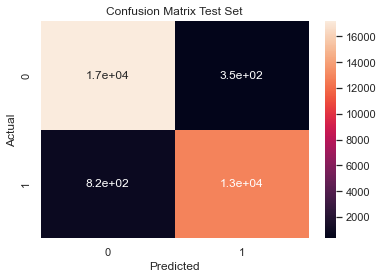

In [180]:
confusion_mat = confusion_matrix(y_test, y_test_pred_RF)
sns.heatmap(confusion_mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Test Set')

**Performance Summary - Random Forest**

Based on result above, I can say that

- The model performance is not significantly different in terms of f-1 score on class Satisfied, I can assume that the model is goodfitting.
- The model has tendency to predict relatively well on class Not Subscribed and class Subscribed.
- Based from diferences between ROC-AUC Score, I can say that the model is goodfitting.
- From confusion matric we got be sure has more score on True positive and True negative its measuring Recall,Precision,Specificty, Accuracy and AUC-ROC score 

**Model Evaluation - SVC**

In [143]:
#Performance Metrics
print('==================== Train Results (SVC) ====================')
print(classification_report(y_train, best_pipe_Lin_SVC.predict(X_train), target_names=['Not Satisfied', 'Satisfied']))

print('==================== Test Results (SVC) ====================')
print(classification_report(y_test, best_pipe_Lin_SVC.predict(X_test), target_names=['Not Satisfied', 'Satisfied']))


==================== Train Results (SVC) ====================
               precision    recall  f1-score   support

Not Satisfied       0.95      0.97      0.96     41324
    Satisfied       0.96      0.93      0.94     31408

     accuracy                           0.95     72732
    macro avg       0.95      0.95      0.95     72732
 weighted avg       0.95      0.95      0.95     72732

==================== Test Results (SVC) ====================
               precision    recall  f1-score   support

Not Satisfied       0.95      0.97      0.96     17555
    Satisfied       0.95      0.93      0.94     13617

     accuracy                           0.95     31172
    macro avg       0.95      0.95      0.95     31172
 weighted avg       0.95      0.95      0.95     31172



In [144]:
#Performance Metrics
print('==================== Train Results (SVC) ====================')
print(roc_auc_score(y_train, best_pipe_Lin_SVC.predict(X_train)))

print('==================== Test Results (SVC) ====================')
print(roc_auc_score(y_test, best_pipe_Lin_SVC.predict(X_test)))

==================== Train Results (SVC) ====================
0.9501589328405528
==================== Test Results (SVC) ====================
0.9476532540633789


**Confusion Matrix of SVC**

Text(0.5, 1.0, 'Confusion Matrix Test Set')

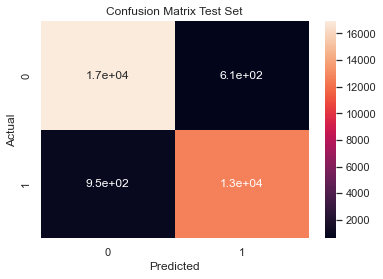

In [181]:
confusion_mat = confusion_matrix(y_test, y_test_pred_SVC)
sns.heatmap(confusion_mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Test Set')

**Performance Summary - SVC**

Based on result above, I can say that

- The model performance is similar and has not different in terms of f-1 score on class Satisfied, I can assume that the model is goodfitting.
- The model has tendency to predict relatively well on class Not Subscribed and class Subscribed.
- Based from diferences between ROC-AUC Score, I can say that the model is goodfitting.
- From this we has predicted positive, negative and it's true, itr means this model extremely useful for measuring Recall, Precision, Specificity, Accuracy, and most importantly AUC-ROC curves


For Inference test, I will use Random Forest as my main model however SVC has perfect result from train and test set, but for time process we need faster like Random Forest.

---
# X. Model Saving

In this part of sub-process, I will save the chosen model so that it can be deployed to the production environment.

In [158]:
# Save the best model
with open('model.pkl', 'wb') as f:
    pickle.dump(best_pipe_RF, f)

---
# X. Model Inference

In this part of process, I will try to feed the machine learning model using the Inference Set and see how it perform.

Before feeding the set into the model, We need to do exact same process of Missing value handling, Feature selection and engineering process to the Inference Set

In [145]:
# Missing Value Check
inf_set.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [151]:
inf_set = inf_set.drop(['Unnamed: 0', 'id'], axis = 1)

In [152]:
# Rename the column
inf_set.rename(columns={'Customer Type': 'Customer_Type','Type of Travel' : 'Type_Travel', 'Flight Distance' : 'Flight_distance', 
                    'Inflight wifi service' : 'Inflight_wifi', 'Departure/Arrival time convenient' : 'Dep/Arv_time', 
                   'Ease of Online booking' : 'Ease_booking', 'Gate location' : 'Gate_location', 'Food and drink'	: 'Food_drink',
                    'Online boarding' : 'Online_boarding', 'Seat comfort' : 'Seat_comfort', 'Inflight entertainment' : 'Inflight_entertainment',
                    'On-board service' : 'On-board_service', 'Leg room service' : 'Leg_room', 'Baggage handling' : 'Baggage_handling',
                    'Checkin service' : 'Checkin_service', 'Inflight service' : 'Inflight_service', 'Departure Delay in Minutes' : 'Departure_delay',
                    'Arrival Delay in Minutes' : 'Arrival_delay', 'satisfaction' : 'Satisfaction'}, inplace=True)

In [154]:
# Convert to numerical format
# Make dictionary
y_rename = {'satisfied':1, 'neutral or dissatisfied':0}
# Renaming process
inf_set['Satisfaction'] = inf_set['Satisfaction'].map(y_rename)
# Confirmation
print(inf_set['Satisfaction'].unique())

[1 0]


In [155]:
# Missing Value Check
# inf_set Set
# Feature : Arrival_delay

inf_set[inf_set['Arrival_delay'].isnull()].sample(5)

,Gender,Customer_Type,Age,Type_Travel,Class,Flight_distance,Inflight_wifi,Dep/Arv_time,Ease_booking,Gate_location,Food_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay,Arrival_delay,Satisfaction
3194,Male,Loyal Customer,29,Business travel,Business,3772,5,5,5,5,5,4,5,5,3,3,5,3,4,5,0,NaN,1
20468,Female,disloyal Customer,21,Business travel,Eco,675,4,4,4,3,2,4,2,2,2,3,3,4,3,2,0,NaN,0
3906,Female,disloyal Customer,33,Business travel,Eco,587,4,0,4,4,3,4,3,3,4,3,5,4,5,3,0,NaN,0
14788,Male,Loyal Customer,62,Personal Travel,Eco,1024,1,5,1,3,2,1,2,2,3,5,4,5,4,2,45,NaN,0
11151,Female,disloyal Customer,26,Business travel,Eco,110,1,0,1,5,5,1,5,5,1,5,3,4,2,5,0,NaN,0


In [160]:
# Calculate the median value
inf_mean_ad = inf_set['Arrival_delay'].median() # Arrival Delay has skewed distribution

In [161]:
# Impute missing value with median
inf_set['Arrival_delay'].fillna(inf_mean_ad, inplace=True)

In [162]:
# Confirmation
print(inf_set.isna().sum())

Gender                    0
Customer_Type             0
Age                       0
Type_Travel               0
Class                     0
Flight_distance           0
Inflight_wifi             0
Dep/Arv_time              0
Ease_booking              0
Gate_location             0
Food_drink                0
Online_boarding           0
Seat_comfort              0
Inflight_entertainment    0
On-board_service          0
Leg_room                  0
Baggage_handling          0
Checkin_service           0
Inflight_service          0
Cleanliness               0
Departure_delay           0
Arrival_delay             0
Satisfaction              0
dtype: int64


Now, I can confirm that the dataset is now free from any missing values.

In [163]:
# Splitting Dataset

# X will be consist of input parameter only
X_inf = inf_set.drop(['Satisfaction'], axis=1)

# use same variables in final features
X_inf = X_inf[final_features]

# y will be consist of target parameter only
y_inf = inf_set['Satisfaction']

After we completed splitting the inference set , now we can go to the next process.

In [165]:
# Create dataframe Inference Set
df_y_inf = pd.DataFrame(y_inf)

**Prediction**

In [164]:
# Determines prediction result
y_inf_pred = best_pipe_RF.predict(X_inf)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished


Deterimation predict result ready to get test.

**Predict Of Inference Set**

In [167]:
# Convert into DataFrame

y_pred_inf_df = pd.DataFrame(y_inf_pred, columns=['Satisfaction - Prediction']).reset_index().drop(['index'], axis=1)
y_pred_inf_df

,Satisfaction - Prediction
0,1
1,1
2,0
3,1
4,0
...,...
25971,0
25972,1
25973,0
25974,1


In [168]:
# Merge Inference-Set and Prediction

pd.concat([inf_set, y_pred_inf_df], axis=1).reset_index()

,index,Gender,Customer_Type,Age,Type_Travel,Class,Flight_distance,Inflight_wifi,Dep/Arv_time,Ease_booking,Gate_location,Food_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay,Arrival_delay,Satisfaction,Satisfaction - Prediction
0,0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1,1
1,1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1,1
2,2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0,0
3,3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1,1
4,4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,0,0
25972,25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,1,1
25973,25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,0,0
25974,25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,1,1


From inference set  we can see, the machine learning doing well on prediction.   

**Evaluation**

In [172]:
# Evaluation for inference set
print('==================== Inference Results (RF) ====================')
print(classification_report(y_inf, y_inf_pred, target_names=['Not Satisfied', 'Satisfied']))

==================== Inference Results (RF) ====================
               precision    recall  f1-score   support

Not Satisfied       0.96      0.98      0.97     14573
    Satisfied       0.97      0.94      0.96     11403

     accuracy                           0.96     25976
    macro avg       0.96      0.96      0.96     25976
 weighted avg       0.96      0.96      0.96     25976



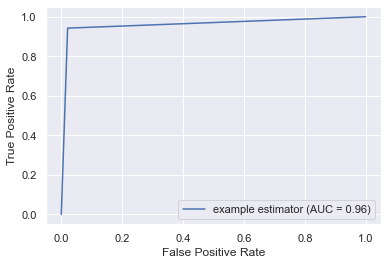

In [173]:
# Plot ROC-AUC curve
y = np.array(y_inf)
pred = np.array(y_inf_pred)

fpr, tpr, thresholds = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

plt.show()

In [174]:
print('==================== Inference Results (RF) ====================')
print(roc_auc_score(y_inf, best_pipe_RF.predict(X_inf)))

==================== Inference Results (RF) ====================
0.9608397020509332


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished


**Inference Process Evaluation**

From above process, We can see that:

- The model successfully predict all the class.
- From the ROC-AUC Score has almost perfect score like train test set.
- From roc-auc curve, almost perfect edge to true positive, this means all data has perfect balance and completed.
- From this we can use this model to prediction satisfaction passengers airlines.

---
# XI. Conclusion
Here all the conclusion that I get from this project

## Overall Data

From this data we get quite balanced data even though there are outliers in the Arrival_delay & Departure_delay columns with negative correlation to the target value but we do capping to generalize the data in these columns, and also we have a missing value in the Arrival_delay section, we impute using the median of the column This is because it has a skewed distribution.
Luckily, this data does not have corrupted data and has balance and correlation with existing features.

## Model Result

To check the model result, we use cross validation to evaluate which model we can use for our final machine learning model, then we got mean_score & stdev_score for those model i use are:

- Random Forest = 0.96
- SVC = 0.94
- KNN = 0.92
- Ada = 0.92
- Logreg = 0.87



## Best Model

The highest f1_score from cross validation is Random Forest Classifier with almost perfect score on train set eventho for test set has 96% score. This model has high accuracy,recall,precision from we see at classification report and we can make sure from confusion matrix. and the model is perfectly fit with ROC-AUC score : 99%.

Tuning the hyper parameter for Random Forest Classifier, we got the best hyper parameter settings for Random Forest are:
- criterion: entropy
- max_features: auto
- min_samples_split: 8

**Insight Recomendation**

Passengers on this airline in the level of satisfaction based on EDA have many influencing factors, one of which is increasing satisfaction with the services provided by the airline and also the ease of ordering tickets and the quality of seats and leg rooms are factors, but the delay time from flights also causes not satisfied from this flight so that it can worsen the level of flight satisfaction.
Companies are required to improve flight efficiency and maximize the booking  and check-in service systems.